In [1]:
from pandas import read_csv, DataFrame, Series, crosstab
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

##  1. Считываем данные на фондовом рынке Франции за период 01.01.2010-31.12.2014

Данные по ценам активов:

In [2]:
datasetPrice = read_csv('adj_close.csv',';', index_col=['Date'], parse_dates=['Date'], dayfirst=True)
datasetPrice.head()

,ACA.PA,AF.PA,AI.PA,AIR.PA,ALO.PA,ALT.PA,BN.PA,BNP.PA,BOL.PA,CNP.PA,...,SAF.PA,SCR.PA,SEV.PA,STM.PA,SU.PA,UG.PA,VIE.PA,VIV.PA,VK.PA,ZC.PA
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,9.436186,7.964,83.949036,38.835205,26.640413,7.729390,50.422443,43.844994,3.600600,12.709974,...,49.272648,21.886477,12.653255,5.522931,56.327557,9.967134,13.119909,16.700682,12.890471,26.976074
2014-12-30,9.418646,7.781,83.255249,38.450142,26.437090,7.593544,50.005726,43.462265,3.609195,12.675447,...,48.474667,21.691021,12.749699,5.511352,55.435383,9.908619,13.071004,16.664356,12.791224,26.454145
2014-12-29,9.471265,7.570,84.357124,38.999569,26.600739,7.579762,50.811371,44.592659,3.711387,12.800605,...,49.003448,21.738800,13.223025,5.531840,57.052444,10.025649,13.315531,16.813686,12.847963,27.106558
2014-12-24,9.484418,7.615,83.867424,39.004257,26.690004,7.609294,50.302055,44.134270,3.642622,12.848079,...,48.945763,21.882133,13.131026,5.514024,56.597065,10.035402,13.257733,16.781399,12.893298,26.710278
2014-12-23,9.523882,7.600,84.561203,39.201492,26.784227,7.530544,50.487263,44.147621,3.714252,12.809237,...,48.849625,21.834356,13.135383,5.515805,56.931629,10.064660,13.248840,16.789471,13.119877,27.043732


In [3]:
datasetPrice.shape

(1278, 32)

In [4]:
datasetPrice.describe()

,ACA.PA,AF.PA,AI.PA,AIR.PA,ALO.PA,ALT.PA,BN.PA,BNP.PA,BOL.PA,CNP.PA,...,SAF.PA,SCR.PA,SEV.PA,STM.PA,SU.PA,UG.PA,VIE.PA,VIV.PA,VK.PA,ZC.PA
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,...,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000
mean,7.145693,8.291621,62.732587,28.991761,29.762124,5.006874,43.547213,37.767783,0.721650,9.756001,...,29.893019,16.093271,9.561694,4.598480,46.029131,11.134263,10.943169,12.130337,25.954124,14.038548
std,2.321406,2.912135,10.249356,12.387206,6.124620,1.599598,5.363249,7.801001,1.125767,1.984843,...,11.261199,3.693069,1.869540,0.917177,9.582489,5.027413,3.371193,1.935587,7.637356,6.900058
min,2.453026,3.055000,40.058216,12.046185,18.656223,2.526916,32.518452,18.413811,-0.000304,5.814239,...,11.785363,10.297086,6.205043,2.698773,27.444208,3.546086,5.789892,7.996094,12.213279,3.382692
25%,5.134587,6.166250,55.133083,18.520649,25.685252,3.656005,38.816887,32.943174,0.000002,8.339084,...,21.172921,12.899205,7.834943,3.778264,37.692819,7.296257,7.706368,10.736920,20.411819,7.927960
50%,7.582931,7.887500,61.556273,24.866395,27.811202,4.978034,43.582254,39.317871,0.004208,9.415104,...,25.419647,15.100245,9.827498,4.662156,45.994659,10.123371,10.973292,11.713642,22.973320,13.072125
75%,9.260732,10.784622,70.906448,41.336655,33.951103,6.014591,48.073307,43.329991,1.633776,11.149124,...,41.743590,20.225273,10.969355,5.363392,54.703499,14.606139,14.074033,13.227834,33.240431,21.220226
max,10.633248,15.115000,84.561203,52.870171,47.942841,8.311160,54.371136,52.604595,4.488811,13.996077,...,51.054699,22.498896,13.516711,6.576987,66.327309,22.400208,17.301737,16.813686,42.931267,27.106558


Данные по объемам продаж:

In [5]:
dataVol = read_csv('volume.csv',';', index_col=['Date'], parse_dates=['Date'], dayfirst=True)
dataVol.head()

,ACA.PA,AF.PA,AI.PA,AIR.PA,ALO.PA,ALT.PA,BN.PA,BNP.PA,BOL.PA,CNP.PA,...,SAF.PA,SCR.PA,SEV.PA,STM.PA,SU.PA,UG.PA,VIE.PA,VIV.PA,VK.PA,ZC.PA
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,888975.0,1511725.0,133543.0,511732.0,141348.0,119155.0,239094.0,558150.0,1242798.0,43324.0,...,230297.0,123226.0,745335.0,214801.0,341798.0,590572.0,494483.0,819050.0,304312.0,149132.0
2014-12-30,2449882.0,2564957.0,567616.0,1368751.0,435896.0,155408.0,878946.0,2150482.0,1408513.0,147658.0,...,288978.0,162863.0,1067161.0,718364.0,1137138.0,959375.0,1270241.0,2403460.0,909153.0,267402.0
2014-12-29,4153832.0,2140022.0,537006.0,1927679.0,618952.0,203608.0,1066493.0,3232746.0,1122986.0,172014.0,...,433884.0,237515.0,716661.0,1124315.0,913357.0,1578524.0,1290817.0,3668598.0,878490.0,277561.0
2014-12-24,863429.0,1373307.0,164417.0,404444.0,224628.0,86273.0,202732.0,559273.0,415335.0,26927.0,...,98327.0,61713.0,325983.0,186496.0,228640.0,310706.0,425491.0,797850.0,391927.0,77442.0
2014-12-23,5039349.0,3347441.0,736029.0,2216026.0,950584.0,420549.0,1310296.0,2516632.0,1336633.0,143621.0,...,382269.0,244863.0,865849.0,1027800.0,1200212.0,1781274.0,1311131.0,3507740.0,1066202.0,367371.0


In [6]:
dataVol.shape

(1278, 32)

In [7]:
dataVol.describe()

,ACA.PA,AF.PA,AI.PA,AIR.PA,ALO.PA,ALT.PA,BN.PA,BNP.PA,BOL.PA,CNP.PA,...,SAF.PA,SCR.PA,SEV.PA,STM.PA,SU.PA,UG.PA,VIE.PA,VIV.PA,VK.PA,ZC.PA
count,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,...,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03,1.278000e+03
mean,1.030918e+07,3.439797e+06,1.094719e+06,2.493911e+06,1.827917e+06,5.469555e+05,2.004647e+06,5.327900e+06,9.022292e+05,3.902902e+05,...,9.901008e+05,4.308482e+05,1.269311e+06,4.023840e+06,1.891772e+06,4.665065e+06,2.868343e+06,5.248743e+06,1.321659e+06,7.727000e+05
std,6.503672e+06,1.960640e+06,4.946141e+05,1.724140e+06,1.449502e+06,4.480377e+05,9.254466e+05,2.821775e+06,2.818170e+06,2.213097e+05,...,5.914316e+05,2.871684e+05,7.023945e+05,2.257299e+06,8.903233e+05,3.272163e+06,1.716616e+06,2.471767e+06,8.630662e+05,5.693986e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.927207e+06,2.127137e+06,7.827015e+05,1.635894e+06,1.142029e+06,2.843998e+05,1.429867e+06,3.482120e+06,3.011000e+05,2.379712e+05,...,6.400758e+05,2.755382e+05,8.375498e+05,2.491714e+06,1.312834e+06,2.645893e+06,1.733517e+06,3.699588e+06,8.504518e+05,4.670802e+05
50%,8.616410e+06,3.028251e+06,1.014046e+06,2.134117e+06,1.557230e+06,4.283510e+05,1.811746e+06,4.563234e+06,4.760500e+05,3.437520e+05,...,8.567765e+05,3.738190e+05,1.117151e+06,3.615976e+06,1.700461e+06,3.713463e+06,2.461460e+06,4.781941e+06,1.119864e+06,6.381875e+05
75%,1.268375e+07,4.146631e+06,1.280372e+06,2.828130e+06,2.095136e+06,6.454162e+05,2.377168e+06,6.342410e+06,8.513250e+05,4.887840e+05,...,1.206488e+06,5.102512e+05,1.527465e+06,5.013608e+06,2.235526e+06,5.572245e+06,3.509276e+06,6.205259e+06,1.537514e+06,9.156225e+05
max,5.648092e+07,1.589568e+07,4.854700e+06,2.689999e+07,2.807808e+07,4.485468e+06,9.557007e+06,2.417537e+07,6.954300e+07,2.195310e+06,...,8.382004e+06,5.430171e+06,1.049614e+07,2.242053e+07,8.564448e+06,3.692675e+07,1.779603e+07,3.210260e+07,1.375391e+07,9.824035e+06


# 2. Преобразуем данные по ценам в данные по доходности

## используя *логарифмическую* доходность

In [8]:
def log_profitability(dataS):
    dataSNew = copy.copy(dataS)
    for column in range(0,dataS.shape[1]):
        for index in range(0,(dataS.shape[0])-1):
            dataSNew.iloc[index][column] = np.log(dataS.iloc[index+1][column]/dataS.iloc[index][column])
    dataSNew.drop(dataSNew.tail(1).index,inplace=True)
    return dataSNew

In [9]:
dataProb = log_profitability(datasetPrice)
dataProb.head()

C:\Users\maks_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log



,ACA.PA,AF.PA,AI.PA,AIR.PA,ALO.PA,ALT.PA,BN.PA,BNP.PA,BOL.PA,CNP.PA,...,SAF.PA,SCR.PA,SEV.PA,STM.PA,SU.PA,UG.PA,VIE.PA,VIV.PA,VK.PA,ZC.PA
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,-0.001861,-0.023247,-0.008299,-0.009965,-0.007661,-0.017732,-0.008299,-0.008767,0.002384,-0.002720,...,-0.016328,-0.008971,0.007593,-0.002099,-0.015966,-0.005888,-0.003735,-0.002177,-0.007729,-0.019537
2014-12-30,0.005571,-0.027492,0.013148,0.014188,0.006171,-0.001817,0.015983,0.025676,0.027921,0.009826,...,0.010849,0.002200,0.036452,0.003711,0.028753,0.011742,0.018535,0.008921,0.004426,0.024363
2014-12-29,0.001388,0.005927,-0.005822,0.000120,0.003350,0.003889,-0.010074,-0.010333,-0.018702,0.003702,...,-0.001178,0.006572,-0.006982,-0.003226,-0.008014,0.000972,-0.004350,-0.001922,0.003522,-0.014727
2014-12-24,0.004152,-0.001972,0.008238,0.005044,0.003524,-0.010403,0.003675,0.000302,0.019474,-0.003028,...,-0.001966,-0.002186,0.000332,0.000323,0.005894,0.002911,-0.000671,0.000481,0.017421,0.012407
2014-12-23,-0.018119,-0.023834,-0.013606,-0.006490,-0.019066,0.003784,-0.002755,-0.018209,0.015817,-0.003375,...,-0.009691,-0.009594,-0.012084,0.002258,-0.021449,-0.015133,-0.007748,-0.016726,-0.032253,-0.010058


Выгружаем данные в файл

In [10]:
dataProb.dropna(axis=1, inplace=True)
dataProb.to_csv(path_or_buf='dataProbability.csv', sep=';')

# 3-4. Проверка данных на значения повторной выборки из некоторого распределения

### Проведем анализ для конкретной компании

##### Анализ по доходности:

In [11]:
company = dataProb["FP.PA"]
company

Date
2014-12-31    0.000353
2014-12-30    0.028050
2014-12-29   -0.002976
2014-12-24    0.002976
2014-12-23   -0.020905
2014-12-22    0.000467
2014-12-19   -0.000700
2014-12-18   -0.023266
2014-12-17   -0.034400
2014-12-16   -0.026568
2014-12-15    0.028915
2014-12-12    0.034291
2014-12-11   -0.000588
2014-12-10    0.015972
2014-12-09    0.025240
2014-12-08    0.018991
2014-12-05   -0.015164
2014-12-04    0.031408
2014-12-03    0.004995
2014-12-02   -0.033487
2014-12-01    0.007922
2014-11-28    0.020025
2014-11-27    0.041292
2014-11-26   -0.003141
2014-11-25    0.015915
2014-11-24    0.001753
2014-11-21   -0.039505
2014-11-20   -0.003220
2014-11-19    0.000537
2014-11-18   -0.010587
                ...   
2010-02-15   -0.001920
2010-02-12   -0.001924
2010-02-11   -0.015158
2010-02-10   -0.009577
2010-02-09    0.008843
2010-02-08   -0.018761
2010-02-05    0.035255
2010-02-04    0.018353
2010-02-03    0.002595
2010-02-02   -0.006025
2010-02-01   -0.003442
2010-01-29   -0.020057
2010-0

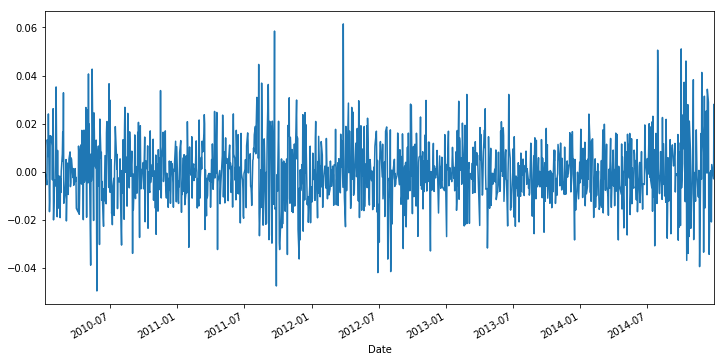

In [12]:
company.plot(figsize=(12,6))

C:\Users\maks_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).mean()



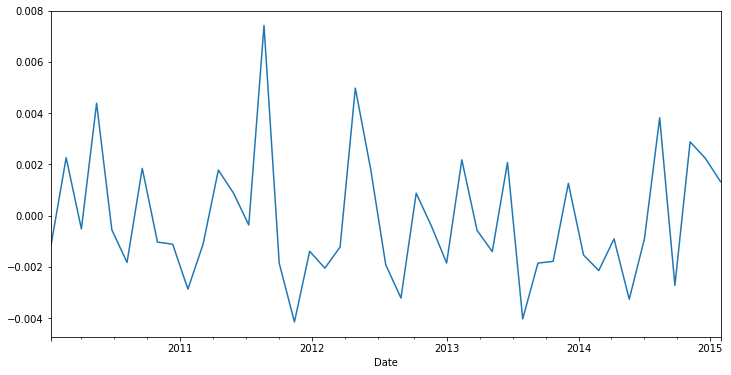

In [13]:
company.resample('6W', how='mean').plot(figsize=(12,6))

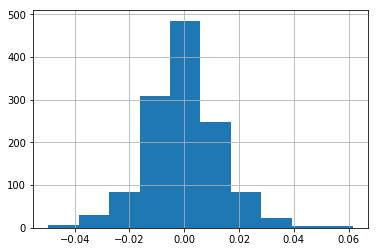

In [14]:
company.hist()

In [15]:
probByYear = DataFrame()
a = company['2010']
a.drop(a.head(1).index,inplace=True)
probByYear['2010'] = a.values
a = company['2011']
a.drop(a.head(3).index,inplace=True)
probByYear['2011'] = a.values
a = company['2012']
probByYear['2012'] = a.values
a = company['2013']
a.drop(a.head(1).index,inplace=True)
probByYear['2013'] = a.values
a = company['2014']
a.drop(a.head(2).index,inplace=True)
probByYear['2014'] = a.values
probByYear

,2010,2011,2012,2013,2014
0,-0.012535,-0.005292,0.015429,0.003940,-0.002976
1,-0.001000,-0.021056,-0.007876,-0.011300,0.002976
2,0.012671,-0.010363,-0.006141,-0.000227,-0.020905
3,0.000123,-0.011011,0.006013,-0.005471,0.000467
4,0.000987,-0.013732,-0.003706,-0.013230,-0.000700
5,-0.014782,-0.006593,0.002174,-0.015993,-0.023266
6,-0.004641,0.019614,-0.006922,-0.013148,-0.034400
7,0.003389,-0.000532,0.006567,0.005114,-0.026568
8,0.000376,0.024586,-0.001512,-0.028394,0.028915
9,0.004249,-0.011757,-0.008992,0.005160,0.034291


In [16]:
corr = probByYear.corr(method='pearson')
corr

,2010,2011,2012,2013,2014
2010,1.000000,0.008748,0.016430,-0.018088,-0.077625
2011,0.008748,1.000000,-0.017455,-0.016077,-0.039236
2012,0.016430,-0.017455,1.000000,-0.082598,-0.075416
2013,-0.018088,-0.016077,-0.082598,1.000000,-0.056272
2014,-0.077625,-0.039236,-0.075416,-0.056272,1.000000


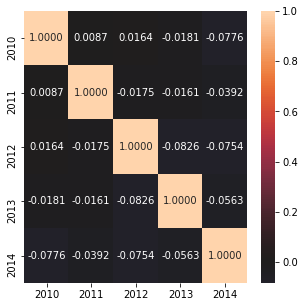

In [17]:
plt.figure(figsize = (5,5))
sns.heatmap(corr, annot=True, fmt=".4f", center=0);

In [18]:
corrUniq = np.zeros(10)
corrUniq[0] = corr['2010']['2011']
corrUniq[1] = corr['2010']['2012']
corrUniq[2] = corr['2010']['2013']
corrUniq[3] = corr['2010']['2014']
corrUniq[4] = corr['2011']['2012']
corrUniq[5] = corr['2011']['2013']
corrUniq[6] = corr['2011']['2014']
corrUniq[7] = corr['2012']['2013']
corrUniq[8] = corr['2012']['2014']
corrUniq[9] = corr['2013']['2014']
corrUniq

array([ 0.00874816,  0.01642956, -0.01808797, -0.0776247 , -0.01745461,
       -0.0160773 , -0.03923634, -0.08259766, -0.07541616, -0.05627214])

In [19]:
corrUniq.mean()

-0.035758915294563133

In [20]:
statistic = np.zeros(10)
statistic[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).statistic
statistic[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).statistic
statistic[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).statistic
statistic[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).statistic
statistic[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).statistic
statistic[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).statistic
statistic[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).statistic
statistic[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).statistic
statistic[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).statistic
statistic[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).statistic
statistic

array([ 0.07480315,  0.04724409,  0.07874016,  0.06692913,  0.08661417,
        0.10629921,  0.05511811,  0.07086614,  0.07480315,  0.09055118])

In [21]:
statistic.mean()

0.075196850393700804

In [22]:
pvalue = np.zeros(10)
pvalue[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).pvalue
pvalue[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).pvalue
pvalue[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).pvalue
pvalue[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).pvalue
pvalue[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).pvalue
pvalue[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).pvalue
pvalue[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).pvalue
pvalue[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).pvalue
pvalue[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).pvalue
pvalue[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).pvalue
pvalue

array([ 0.46123387,  0.933853  ,  0.39608918,  0.6054357 ,  0.28382826,
        0.10608061,  0.8247416 ,  0.53147885,  0.46123387,  0.23705982])

In [23]:
pvalue.mean()

0.48410347674918575

In [24]:
ks_results = stats.kstest(company, cdf='norm')
ks_results

KstestResult(statistic=0.48168460940644214, pvalue=0.0)

##### Анализ по объему:

In [25]:
company = dataVol["FP.PA"]
company

Date
2014-12-31     1357217.0
2014-12-30     5006078.0
2014-12-29     4842201.0
2014-12-24      984969.0
2014-12-23     5638668.0
2014-12-22     7715224.0
2014-12-19    18774080.0
2014-12-18    12546526.0
2014-12-17    11967934.0
2014-12-16    19984005.0
2014-12-15    11804036.0
2014-12-12     8676170.0
2014-12-11     8572086.0
2014-12-10     7857409.0
2014-12-09    11288951.0
2014-12-08     5302520.0
2014-12-05     8313523.0
2014-12-04     9967345.0
2014-12-03     7101955.0
2014-12-02    10407558.0
2014-12-01     8064178.0
2014-11-28    12596104.0
2014-11-27     8968304.0
2014-11-26     4992653.0
2014-11-25     6561112.0
2014-11-24     7296130.0
2014-11-21    11177812.0
2014-11-20     5670863.0
2014-11-19     3540461.0
2014-11-18     5325207.0
                 ...    
2010-02-12     7125154.0
2010-02-11    10466203.0
2010-02-10     8745859.0
2010-02-09     7817618.0
2010-02-08     7206580.0
2010-02-05    13653747.0
2010-02-04     7310050.0
2010-02-03     5711112.0
2010-02-02     85314

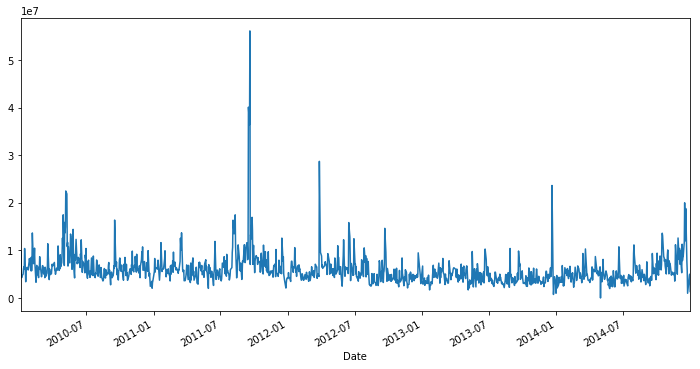

In [26]:
company.plot(figsize=(12,6))

C:\Users\maks_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).mean()



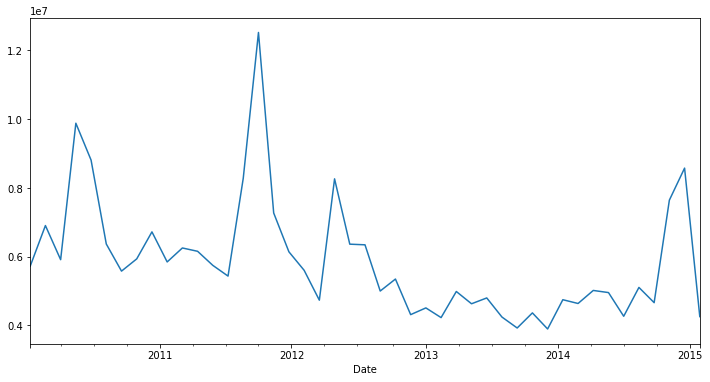

In [27]:
company.resample('6W', how='mean').plot(figsize=(12,6))

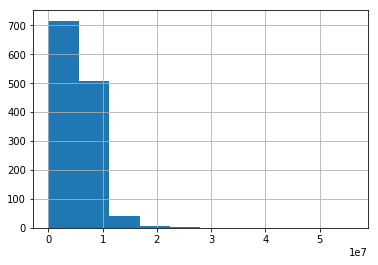

In [28]:
company.hist()

In [29]:
volByYear = DataFrame()
a = company['2010']
a.drop(a.head(2).index,inplace=True)
volByYear['2010'] = a.values
a = company['2011']
a.drop(a.head(3).index,inplace=True)
volByYear['2011'] = a.values
a = company['2012']
volByYear['2012'] = a.values
a = company['2013']
a.drop(a.head(1).index,inplace=True)
volByYear['2013'] = a.values
a = company['2014']
a.drop(a.head(2).index,inplace=True)
volByYear['2014'] = a.values
volByYear

,2010,2011,2012,2013,2014
0,2046653.0,2082367.0,3015559.0,3112369.0,4842201.0
1,3503336.0,3841537.0,4387748.0,4468518.0,984969.0
2,2442370.0,4420363.0,9480467.0,735234.0,5638668.0
3,3727692.0,5003341.0,5085931.0,3991218.0,7715224.0
4,5235592.0,8647528.0,4352863.0,23623961.0,18774080.0
5,4531202.0,7733976.0,4968258.0,7240881.0,12546526.0
6,9938878.0,12579019.0,4290472.0,5269632.0,11967934.0
7,5564878.0,5085896.0,4654117.0,4501474.0,19984005.0
8,5801349.0,6675564.0,4081820.0,6337048.0,11804036.0
9,6456757.0,6569786.0,4368210.0,4153270.0,8676170.0


In [30]:
corrVol = volByYear.corr(method='pearson')
corrVol

,2010,2011,2012,2013,2014
2010,1.000000,0.058348,0.140351,-0.048686,-0.055438
2011,0.058348,1.000000,-0.044355,0.064437,0.082854
2012,0.140351,-0.044355,1.000000,0.063399,-0.148965
2013,-0.048686,0.064437,0.063399,1.000000,0.289081
2014,-0.055438,0.082854,-0.148965,0.289081,1.000000


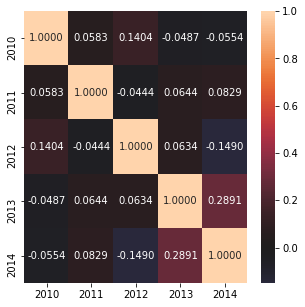

In [31]:
plt.figure(figsize = (5,5))
sns.heatmap(corrVol, annot=True, fmt=".4f", center=0);

In [32]:
corrUniq = np.zeros(10)
corrUniq[0] = corrVol['2010']['2011']
corrUniq[1] = corrVol['2010']['2012']
corrUniq[2] = corrVol['2010']['2013']
corrUniq[3] = corrVol['2010']['2014']
corrUniq[4] = corrVol['2011']['2012']
corrUniq[5] = corrVol['2011']['2013']
corrUniq[6] = corrVol['2011']['2014']
corrUniq[7] = corrVol['2012']['2013']
corrUniq[8] = corrVol['2012']['2014']
corrUniq[9] = corrVol['2013']['2014']
corrUniq

array([ 0.05834763,  0.14035095, -0.04868551, -0.05543785, -0.04435536,
        0.06443723,  0.08285431,  0.06339911, -0.14896503,  0.28908131])

In [33]:
corrUniq.mean()

0.04010267916978847

In [34]:
statistic = np.zeros(10)
statistic[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).statistic
statistic[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).statistic
statistic[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).statistic
statistic[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).statistic
statistic[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).statistic
statistic[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).statistic
statistic[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).statistic
statistic[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).statistic
statistic[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).statistic
statistic[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).statistic
statistic

array([ 0.05905512,  0.33070866,  0.53149606,  0.35826772,  0.32283465,
        0.52755906,  0.35433071,  0.26771654,  0.08267717,  0.22834646])

In [35]:
statistic.mean()

0.30629921259842519

In [36]:
pvalue = np.zeros(10)
pvalue[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).pvalue
pvalue[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).pvalue
pvalue[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).pvalue
pvalue[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).pvalue
pvalue[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).pvalue
pvalue[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).pvalue
pvalue[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).pvalue
pvalue[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).pvalue
pvalue[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).pvalue
pvalue[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).pvalue
pvalue

array([  7.55291447e-01,   9.05948687e-13,   2.61698806e-32,
         6.51719661e-15,   3.45073754e-12,   7.73386241e-32,
         1.35115859e-14,   1.62816924e-08,   3.36840689e-01,
         2.60598623e-06])

In [37]:
pvalue.mean()

0.10921347586714117

In [38]:
ks_results = stats.kstest(company, cdf='norm')
ks_results

KstestResult(statistic=0.99921752738654146, pvalue=0.0)

### Функция для анализа всех компаний по *доходностям*

In [44]:
from scipy.stats import ttest_ind as tt

def analisysProb(companyName):
    print("\n",companyName)
    company = dataProb[companyName]
    probByYear = DataFrame()
    a = company['2010']
    a.drop(a.head(1).index,inplace=True)
    probByYear['2010'] = a.values
    a = company['2011']
    a.drop(a.head(3).index,inplace=True)
    probByYear['2011'] = a.values
    a = company['2012']
    probByYear['2012'] = a.values
    a = company['2013']
    a.drop(a.head(1).index,inplace=True)
    probByYear['2013'] = a.values
    a = company['2014']
    a.drop(a.head(2).index,inplace=True)
    probByYear['2014'] = a.values
    print("Проверка на независимость:")
    corr = probByYear.corr(method='pearson')
    corrUniq = np.zeros(10)
    corrUniq[0] = corr['2010']['2011']
    corrUniq[1] = corr['2010']['2012']
    corrUniq[2] = corr['2010']['2013']
    corrUniq[3] = corr['2010']['2014']
    corrUniq[4] = corr['2011']['2012']
    corrUniq[5] = corr['2011']['2013']
    corrUniq[6] = corr['2011']['2014']
    corrUniq[7] = corr['2012']['2013']
    corrUniq[8] = corr['2012']['2014']
    corrUniq[9] = corr['2013']['2014']
    print("\tcorr mean = ", corrUniq.mean())
    print("Проверка на одинаковую распределенность:")
    statistic = np.zeros(10)
    statistic[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).statistic
    statistic[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).statistic
    statistic[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).statistic
    statistic[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).statistic
    statistic[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).statistic
    statistic[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).statistic
    statistic[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).statistic
    statistic[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).statistic
    statistic[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).statistic
    statistic[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).statistic
    print("\tstatistic = ", statistic.mean())
    pvalue = np.zeros(10)
    pvalue[0] = stats.ks_2samp(probByYear['2010'], probByYear['2011']).pvalue
    pvalue[1] = stats.ks_2samp(probByYear['2010'], probByYear['2012']).pvalue
    pvalue[2] = stats.ks_2samp(probByYear['2010'], probByYear['2013']).pvalue
    pvalue[3] = stats.ks_2samp(probByYear['2010'], probByYear['2014']).pvalue
    pvalue[4] = stats.ks_2samp(probByYear['2011'], probByYear['2012']).pvalue
    pvalue[5] = stats.ks_2samp(probByYear['2011'], probByYear['2013']).pvalue
    pvalue[6] = stats.ks_2samp(probByYear['2011'], probByYear['2014']).pvalue
    pvalue[7] = stats.ks_2samp(probByYear['2012'], probByYear['2013']).pvalue
    pvalue[8] = stats.ks_2samp(probByYear['2012'], probByYear['2014']).pvalue
    pvalue[9] = stats.ks_2samp(probByYear['2013'], probByYear['2014']).pvalue
    print("\tp-value = ", pvalue.mean())
    print("Тест Колмогорова-Смирнова:")
    ks_results = stats.kstest(company, cdf='norm')
    print("\tstatistic = ", ks_results.statistic)
    print("\tp=value = ", ks_results.pvalue)
    print("Тест на распределение Стьюдента:")
    a = np.random.standard_t(1, size=254)
    print("\tp=value = ", tt(company, a).pvalue)

In [40]:
names = dataProb.columns
names

Index(['ACA.PA', 'AF.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'ALT.PA', 'BN.PA',
       'BNP.PA', 'CNP.PA', 'CS.PA', 'DG.PA', 'FP.PA', 'GLE.PA', 'ING.PA',
       'KN.PA', 'LI.PA', 'LR.PA', 'MAU.PA', 'ORA.PA', 'RNO.PA', 'RXL.PA',
       'SAF.PA', 'SCR.PA', 'SEV.PA', 'STM.PA', 'SU.PA', 'UG.PA', 'VIE.PA',
       'VIV.PA', 'VK.PA', 'ZC.PA'],
      dtype='object')

In [45]:
for name in names:
    analisysProb(name)


 ACA.PA
Проверка на независимость:
	corr mean =  -0.0207662861554
Проверка на одинаковую распределенность:
	statistic =  0.122047244094
	p-value =  0.160645500517
Тест Колмогорова-Смирнова:
	statistic =  0.461905936926
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  0.00443042934331

 AF.PA
Проверка на независимость:
	corr mean =  -0.0211519224104
Проверка на одинаковую распределенность:
	statistic =  0.100787401575
	p-value =  0.202827715149
Тест Колмогорова-Смирнова:
	statistic =  0.463553905031
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  0.00136309562311

 AI.PA
Проверка на независимость:
	corr mean =  0.00410519121053
Проверка на одинаковую распределенность:
	statistic =  0.0842519685039
	p-value =  0.432989747223
Тест Колмогорова-Смирнова:
	statistic =  0.483640888202
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  0.125728532547

 AIR.PA
Проверка на независимость:
	corr mean =  0.00856870450387
Проверка на одинаковую распределенность:
	

### Функция для анализа всех компаний по *объему продаж*

In [46]:
def analisysVol(companyName):
    print("\n",companyName)
    company = dataVol[companyName]
    volByYear = DataFrame()
    a = company['2010']
    a.drop(a.head(2).index,inplace=True)
    volByYear['2010'] = a.values
    a = company['2011']
    a.drop(a.head(3).index,inplace=True)
    volByYear['2011'] = a.values
    a = company['2012']
    volByYear['2012'] = a.values
    a = company['2013']
    a.drop(a.head(1).index,inplace=True)
    volByYear['2013'] = a.values
    a = company['2014']
    a.drop(a.head(2).index,inplace=True)
    volByYear['2014'] = a.values
    print("Проверка на независимость:")
    corrVol = volByYear.corr(method='pearson')
    corrUniq = np.zeros(10)
    corrUniq[0] = corrVol['2010']['2011']
    corrUniq[1] = corrVol['2010']['2012']
    corrUniq[2] = corrVol['2010']['2013']
    corrUniq[3] = corrVol['2010']['2014']
    corrUniq[4] = corrVol['2011']['2012']
    corrUniq[5] = corrVol['2011']['2013']
    corrUniq[6] = corrVol['2011']['2014']
    corrUniq[7] = corrVol['2012']['2013']
    corrUniq[8] = corrVol['2012']['2014']
    corrUniq[9] = corrVol['2013']['2014']
    print("\tcorr mean = ", corrUniq.mean())
    print("Проверка на одинаковую распределенность:")
    statistic = np.zeros(10)
    statistic[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).statistic
    statistic[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).statistic
    statistic[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).statistic
    statistic[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).statistic
    statistic[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).statistic
    statistic[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).statistic
    statistic[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).statistic
    statistic[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).statistic
    statistic[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).statistic
    statistic[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).statistic
    print("\tstatistic = ", statistic.mean())
    pvalue = np.zeros(10)
    pvalue[0] = stats.ks_2samp(volByYear['2010'], volByYear['2011']).pvalue
    pvalue[1] = stats.ks_2samp(volByYear['2010'], volByYear['2012']).pvalue
    pvalue[2] = stats.ks_2samp(volByYear['2010'], volByYear['2013']).pvalue
    pvalue[3] = stats.ks_2samp(volByYear['2010'], volByYear['2014']).pvalue
    pvalue[4] = stats.ks_2samp(volByYear['2011'], volByYear['2012']).pvalue
    pvalue[5] = stats.ks_2samp(volByYear['2011'], volByYear['2013']).pvalue
    pvalue[6] = stats.ks_2samp(volByYear['2011'], volByYear['2014']).pvalue
    pvalue[7] = stats.ks_2samp(volByYear['2012'], volByYear['2013']).pvalue
    pvalue[8] = stats.ks_2samp(volByYear['2012'], volByYear['2014']).pvalue
    pvalue[9] = stats.ks_2samp(volByYear['2013'], volByYear['2014']).pvalue    
    print("\tp-value = ", pvalue.mean())
    print("Тест Колмогорова-Смирнова:")
    ks_results = stats.kstest(company, cdf='norm')
    print("\tstatistic = ", ks_results.statistic)
    print("\tp=value = ", ks_results.pvalue)
    print("Тест на распределение Стьюдента:")
    a = np.random.standard_t(1, size=254)
    print("\tp=value = ", tt(company, a).pvalue)

In [47]:
names = dataVol.columns
names

Index(['ACA.PA', 'AF.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'ALT.PA', 'BN.PA',
       'BNP.PA', 'BOL.PA', 'CNP.PA', 'CS.PA', 'DG.PA', 'FP.PA', 'GLE.PA',
       'ING.PA', 'KN.PA', 'LI.PA', 'LR.PA', 'MAU.PA', 'ORA.PA', 'RNO.PA',
       'RXL.PA', 'SAF.PA', 'SCR.PA', 'SEV.PA', 'STM.PA', 'SU.PA', 'UG.PA',
       'VIE.PA', 'VIV.PA', 'VK.PA', 'ZC.PA'],
      dtype='object')

In [48]:
for name in names:
    analisysVol(name)


 ACA.PA
Проверка на независимость:
	corr mean =  0.00713440874082
Проверка на одинаковую распределенность:
	statistic =  0.379921259843
	p-value =  0.00334961010706
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  6.26457392367e-118

 AF.PA
Проверка на независимость:
	corr mean =  0.0394050249683
Проверка на одинаковую распределенность:
	statistic =  0.254724409449
	p-value =  0.105644915809
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  2.93893239106e-139

 AI.PA
Проверка на независимость:
	corr mean =  0.0122656818788
Проверка на одинаковую распределенность:
	statistic =  0.316929133858
	p-value =  0.0325685334729
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  6.9961760763e-200

 AIR.PA
Проверка на независимость:
	corr mean =  0.00744100383977
Проверка на одинаковую распределенн

	p-value =  0.00676956626362
Тест Колмогорова-Смирнова:
	statistic =  0.999217527387
	p=value =  0.0
Тест на распределение Стьюдента:
	p=value =  1.09257037064e-90


# 5. Исследование зависимости между доходностями нескольких активов

Выбираем 2 конкретных компании и проводим для них анализ нужными методами

In [50]:
company1 = dataProb['MAU.PA']
company2 = dataProb['FP.PA']

## Коэффициент корреляции

In [51]:
np.corrcoef(company1, company2)[0][1]

0.50487408588702498

## Линейная регрессия

In [52]:
company1_New = []
for n in company1:
    company1_New.append([n])

In [53]:
def RMSE(trueY, predictedY):
    return np.sqrt(mean_squared_error(trueY, predictedY))

In [54]:
regressionModel = linear_model.LinearRegression()
regressionModel.fit(company1_New, company2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Оценка качества регрессии

In [55]:
predictedCompany2 = regressionModel.predict(company1_New)
coef = r2_score(company2, predictedCompany2)
err = RMSE(company2, predictedCompany2)
print("r2_score = ", coef)
print("RMSE = ", err)

r2_score =  0.2548978426
RMSE =  0.0117024158124


In [58]:
regressionModel.coef_[0]
corX = np.linspace(-0.17, 0.1, 150)
corXNew = []
for n in corX:
    corXNew.append([n])
corY = regressionModel.predict(corXNew)

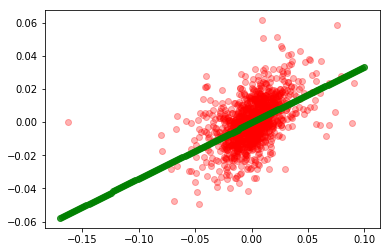

In [59]:
plt.plot(company1, company2, 'o', alpha = 0.3, color="red");
plt.plot(corX, corY, 'o', alpha = 0.8, color="green");

## Таблица сопряженности признаков, тест Хи-квадрат

In [60]:
a = crosstab(company1, company2)
colsum = a.sum(axis=0)
colpct = a/colsum
cs1 = stats.chi2_contingency(a)
# chi-square value, p-value
print("Chi-square value = ", cs1[0])
print("P-value = ", cs1[1])

Chi-square value =  1583096.9
P-value =  0.0363423733776


# 6. Исследование зависимости между доходностью и объемом продаж одного актива

Выбираем конкретную компанию и проводим для нее анализ нужными методами

## Коэффициент корреляции

In [61]:
dataVol.drop(dataVol.tail(1).index,inplace=True)

In [62]:
com = "SEV.PA"
prob = dataProb[com].values
vol = dataVol[com].values

In [63]:
np.corrcoef(prob, vol)[0][1]

0.014267802030307154

## Линейная регрессия

In [64]:
prob_New = []
for n in prob:
    prob_New.append([n])

In [65]:
def RMSE(trueY, predictedY):
    return np.sqrt(mean_squared_error(trueY, predictedY))

In [66]:
regressionModel = linear_model.LinearRegression()
regressionModel.fit(prob_New, vol)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Оценка качества регрессии

In [67]:
predictedVol = regressionModel.predict(prob_New)
coef = r2_score(vol, predictedVol)
err = RMSE(vol, predictedVol)
print("r2_score = ", coef)
print("RMSE = ", err)

r2_score =  0.000203570174776
RMSE =  702288.494816


In [70]:
regressionModel.coef_[0]
corX = np.linspace(-0.09, 0.08, 150)
corXNew = []
for n in corX:
    corXNew.append([n])
corY = regressionModel.predict(corXNew)

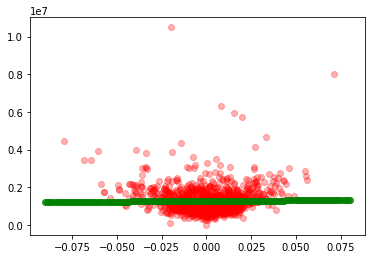

In [71]:
plt.plot(prob, vol, 'o', alpha = 0.3, color="red");
plt.plot(corX, corY, 'o', alpha = 0.8, color="green");

## Таблица сопряженности признаков, тест Хи-квадрат

In [72]:
a = crosstab(prob, vol)
colsum = a.sum(axis=0)
colpct = a/colsum
cs1 = stats.chi2_contingency(a)
# chi-square value, p-value
print("Chi-square value = ", cs1[0])
print("P-value = ", cs1[1])

Chi-square value =  1598804.0
P-value =  0.241771546314
